# Imports + Preprocessing

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X = train_data.copy()
y = X.pop('label')

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, train_size=0.75)

input_shape = [X.shape[1]]

input_shape

[784]

# Building the Model

First we have to build the model, which we can do using Keras Sequential. By adding three different dense layers, we can tune the model to as close to 100% accuracy as possible. Between each Dense layer we must use BatchNormalization in order to keep the data standardized for the model to work with and drop out a certain percentage of the neurons to prevent overfitting to a specific pattern which may affect the overall result of the model tested on any other data set (aka the test data.)

In [ ]:
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(2048, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(2048, activation='relu'),    
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(10, activation='sigmoid'),
])

# Set compliation settings for the model
model.compile(
    optimizer='adam',
    loss='crossentropy',
    metrics=['accuracy'],
)

# If improvement is becoming minimal or is increasing, stop after 10 iterations of no further progress.
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Finally, fit the model to the training data and test it on the validation.
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1024,
    epochs=200,
    callbacks=[early_stopping],
    verbose=2,
)

Epoch 1/200
31/31 - 5s - 146ms/step - accuracy: 0.8702 - loss: 0.5838 - val_accuracy: 0.8929 - val_loss: 0.5415
Epoch 2/200
31/31 - 3s - 111ms/step - accuracy: 0.9534 - loss: 0.1706 - val_accuracy: 0.9387 - val_loss: 0.2815
Epoch 3/200
31/31 - 3s - 111ms/step - accuracy: 0.9690 - loss: 0.1015 - val_accuracy: 0.9471 - val_loss: 0.2143
Epoch 4/200
31/31 - 3s - 109ms/step - accuracy: 0.9763 - loss: 0.0743 - val_accuracy: 0.9641 - val_loss: 0.1726
Epoch 5/200
31/31 - 3s - 111ms/step - accuracy: 0.9817 - loss: 0.0570 - val_accuracy: 0.9613 - val_loss: 0.1745
Epoch 6/200
31/31 - 4s - 130ms/step - accuracy: 0.9852 - loss: 0.0465 - val_accuracy: 0.9699 - val_loss: 0.1545
Epoch 7/200
31/31 - 4s - 131ms/step - accuracy: 0.9879 - loss: 0.0382 - val_accuracy: 0.9701 - val_loss: 0.1543
Epoch 8/200
31/31 - 4s - 117ms/step - accuracy: 0.9913 - loss: 0.0321 - val_accuracy: 0.9731 - val_loss: 0.1548
Epoch 9/200
31/31 - 4s - 126ms/step - accuracy: 0.9921 - loss: 0.0258 - val_accuracy: 0.9721 - val_loss:

By increasing the amount of units in each dense layer, we can build a greater amount of neurons to hold weights and data in order to make a better prediction of the certain handwritings of numbers. I tried adding more Dense layers, but it takes a lot longer for the model to compile with very little improvement, making an increase in the number of units better in the long run.

Best Validation Loss: 0.1531
Best Validation Accuracy: 0.9742


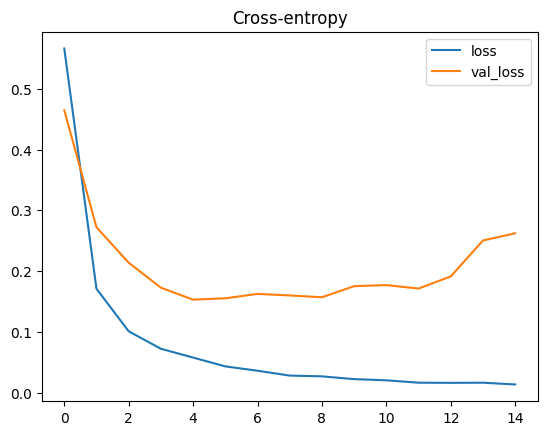

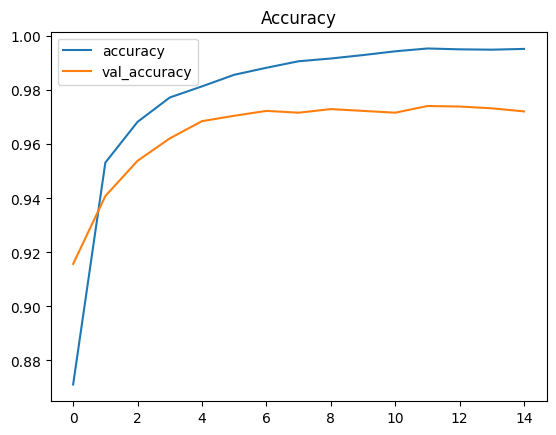

In [7]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

I then wanted to try some other methods, such as layer tapering and using the softmax activation method at the end of the sequential.

In [50]:
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(2048, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(1028, activation='relu'),    
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax'),
])

# Set compliation settings for the model
model.compile(
    optimizer='adam',
    loss='crossentropy',
    metrics=['accuracy'],
)

# If improvement is becoming minimal or is increasing, stop after 10 iterations of no further progress.
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Finally, fit the model to the training data and test it on the validation.
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1024,
    epochs=200,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.8677 - loss: 0.5179 - val_accuracy: 0.9061 - val_loss: 0.4278
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9521 - loss: 0.1556 - val_accuracy: 0.9306 - val_loss: 0.2679
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9661 - loss: 0.1050 - val_accuracy: 0.9500 - val_loss: 0.1770
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9763 - loss: 0.0742 - val_accuracy: 0.9621 - val_loss: 0.1437
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9807 - loss: 0.0601 - val_accuracy: 0.9700 - val_loss: 0.1203
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9846 - loss: 0.0463 - val_accuracy: 0.9721 - val_loss: 0.1194
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9874 - loss: 0.0413 - val_accuracy: 0.9731 - val_loss: 0.1209
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9902 - loss: 0.0302 - val_accuracy: 0.

Best Validation Loss: 0.1102
Best Validation Accuracy: 0.9770


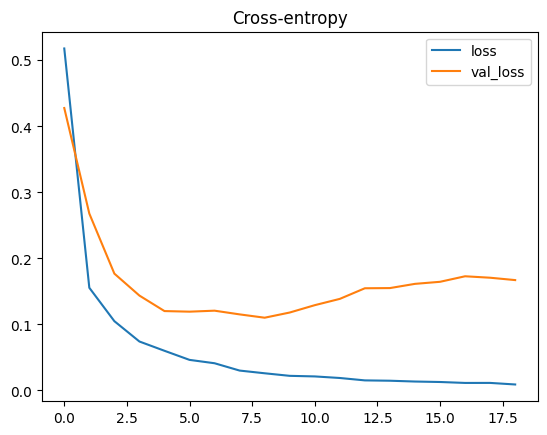

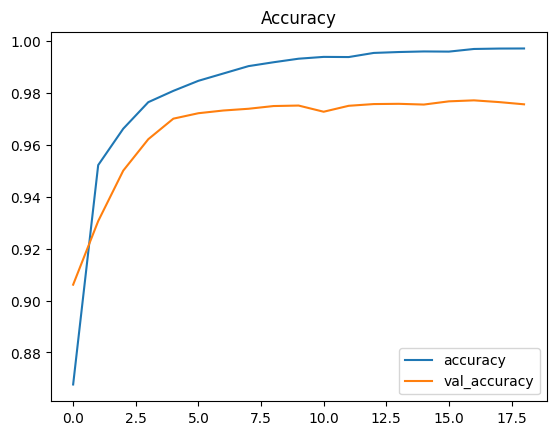

In [51]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

# 0.1250
# 0.9769

Overall, the model was a more successful using that technique in order to optimize the accuracy for the validation and training data. I attempted to adjust more parts of the model, such as increasing the number of Dense layers again with the layer tapering, but they seem to negatively affect the accuracy.

In [18]:
test_preds = model.predict(test_data).argmax(axis=1)

test_preds_df = pd.DataFrame({
    'ImageId': range(1, len(test_preds) + 1),
    'Label': test_preds
})

test_preds_df

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


# Submission

In [19]:
# Note that your test data needs to be in dataframe called test_data, or change it below
output = pd.DataFrame({'ImageId': test_preds_df.ImageId, 'Label': test_preds_df.Label})

# Create a submission file name with date and time appended
submission_file_name = f'submission_{pd.Timestamp.now().strftime("%Y-%m-%d_%H-%M-%S")}.csv'

# Save to csv file
output.to_csv(submission_file_name, index=False)

With a final submission, I was able to obtain the accuracy below.

Best Score: 97.025% Accuracy